In [2]:
words = open('names.txt').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(word) for word in words), max(len(word) for word in words)

(2, 15)

We are starting with character level language model, basically it will predict a character given some sequence of character/s

We will start with making a bigram language model, In this model we are working with two characters at a time, we are only looking at one character that is given, and we will be trying to predict the next character. It's a very simple and weak language model, but it is a great place to start

In [6]:
# let's print the two letter sequences for the first word
for word in words[:1]:
    for ch1, ch2 in zip(word, word[1:]):
        print(ch1, ch2)

e m
m m
m a


Let's wrap these words under special start and end tokens <S> and <E>

In [7]:
for word in words[:3]:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2) 

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


Now in order to learn about the statistics of which character are likely to follow which characters, The simplest way in the bigram language models is to simply do it by counting. Basically we are going to count how often any one of these combinations occur in the training set. Let's maintain a dictionary for that

In [8]:
bigram_counts = {}
for word in words[:3]:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigram_counts[bigram] = bigram_counts.get((bigram), 0) + 1

In [9]:
bigram_counts

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [10]:
# Let's see it for all the words
bigram_counts = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigram_counts[bigram] = bigram_counts.get((bigram), 0) + 1

In [11]:
# we want to sort by the value, bydefault sorted sorts by the key
sorted(bigram_counts.items(),  key = lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

We see n was very often the ending character, and apparently n always follow an a.

#### It will be more convenient for us to keep the above info in 2D Arrays instead of a python dictionary. Let's use pytorch

In [12]:
import torch

In [13]:
# a = torch.zeros((3,5), dtype = torch.int32)
# a
# a[1,3] = 1
# a

In [14]:
# So we can use a tensor to store the counts
# In english alphabet we have 26 letters, +2 for <S> and <E>

N = torch.zeros((28, 28), dtype = torch.int32)

In [15]:
# Let's see it for all the words
bigram_counts = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigram_counts[bigram] = bigram_counts.get((bigram), 0) + 1

# We have this characters ch1, ch2 which are strings but now we have to index them into an array N
# Since we index through integers, we need to map the characters to integers
# we need a lookup table to map the characters to integers

In [16]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}

In [17]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [18]:
stoi['<S>'] = 26
stoi['<E>'] = 27

In [19]:
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

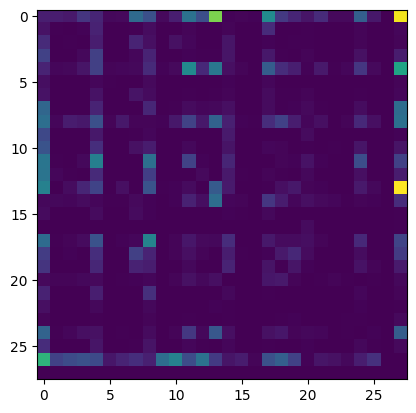

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

##### Let's use some better visualisation

In [21]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

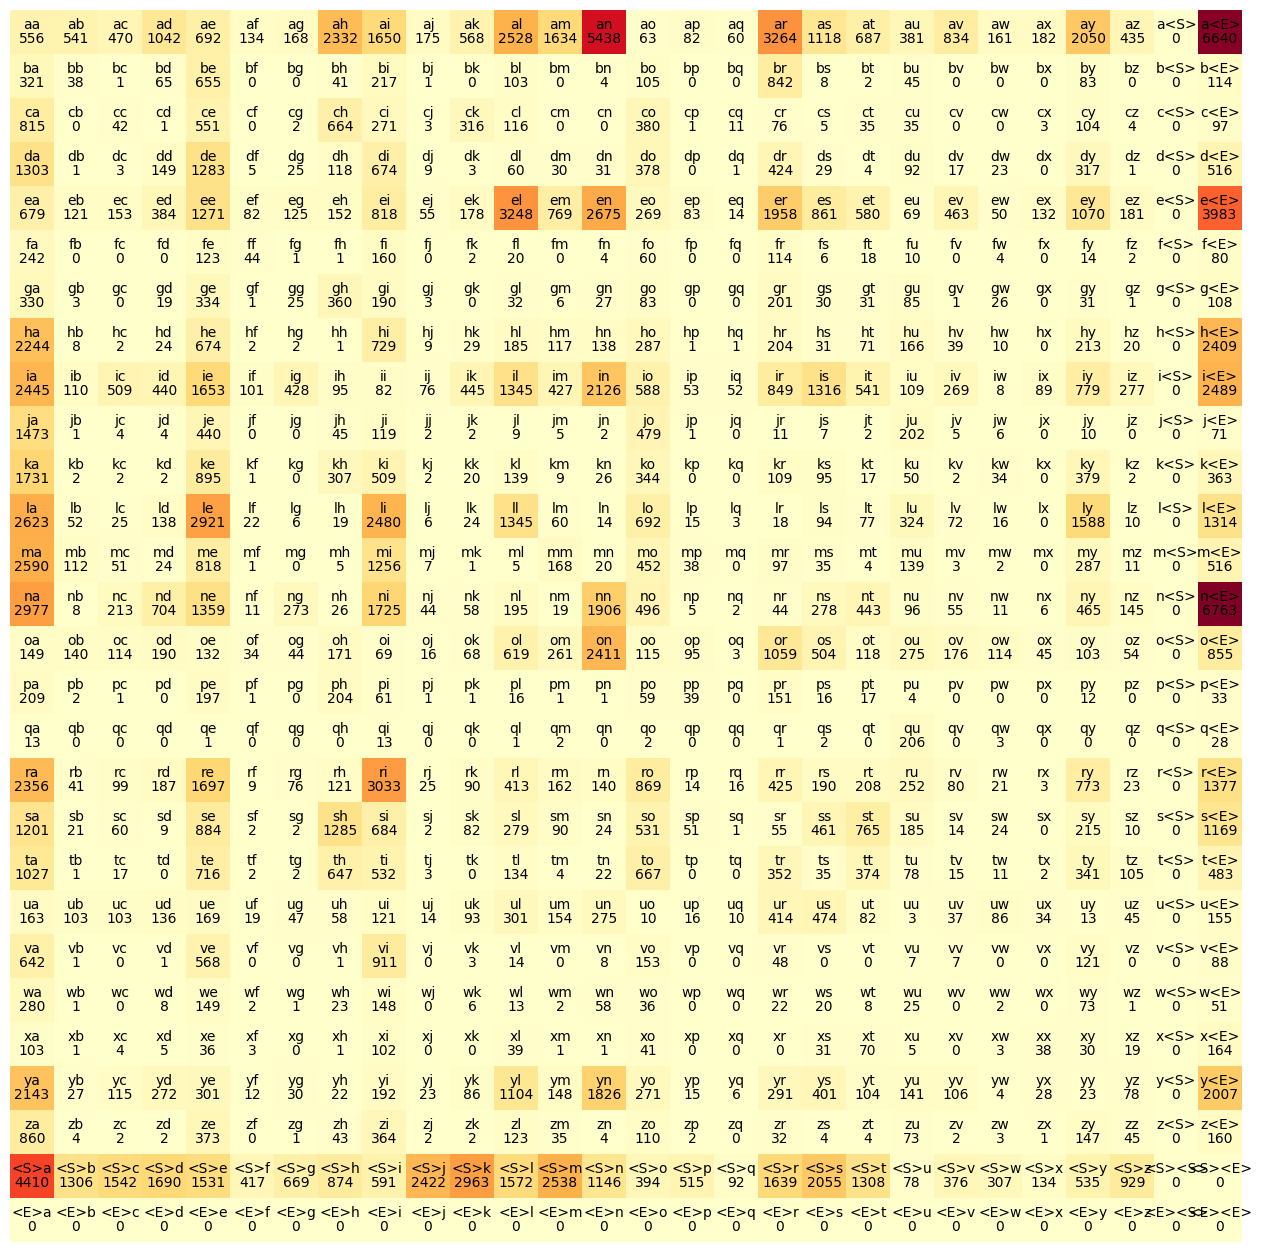

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='YlOrRd')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        # basically we are putting the two text in the middle of the square
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j,i, N[i,j].item(), ha='center', va='top', color='black')
        # N[i,j] will return a tensor, N[i,j].item() will return the value
        # ha = horizontal alignment
        # va = vertical alignment
plt.axis('off')

- You see a lot of space is wasted in the last row because it's obvious <E> ke baad aur koi word nahi aayega
- Similarly in last second column, \<S> se pehle aur kuch nahi aayega
- Also \<S> and \<E> together kaafi conjusted hai

Let's fix all this and beautify the graph a little, It's convention in NLP to use \<S> and \<E> as special characters, let's use something else, let's just use only one special character '.'



In [23]:
import torch
N = torch.zeros((27, 27), dtype = torch.int32)

In [24]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [25]:
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

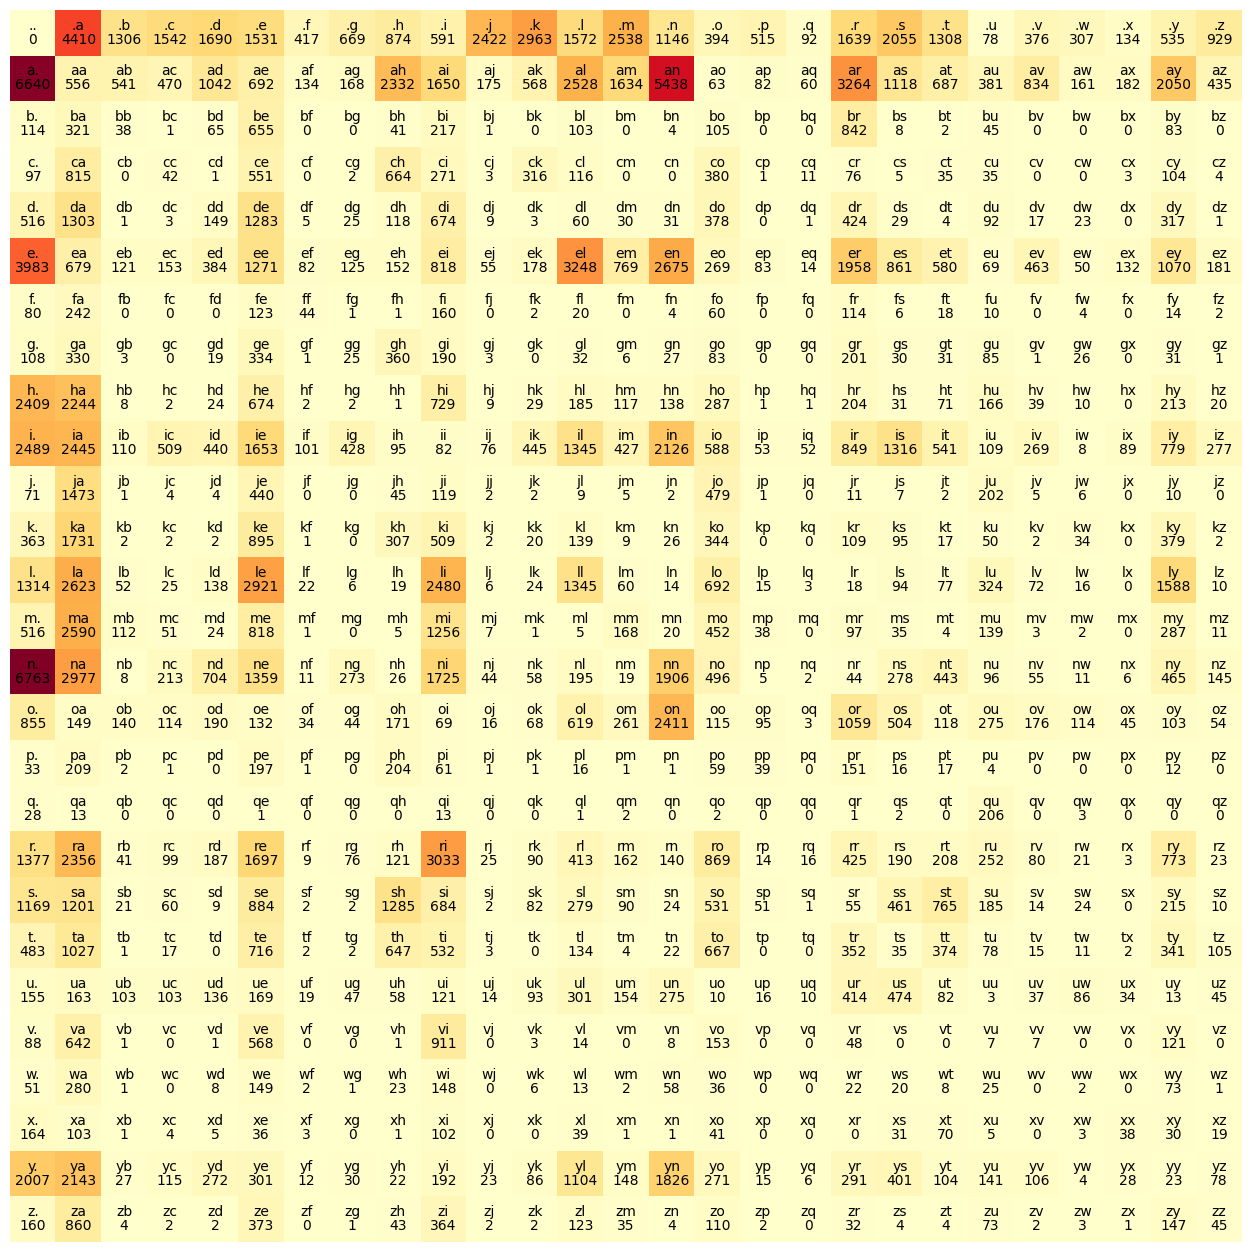

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='YlOrRd')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j,i, N[i,j].item(), ha='center', va='top', color='black')
plt.axis('off')

In [27]:
N[0, :] # or N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

This is basically telling the count of . ke baad kaun kaun sa character kitna baar aa raha. Basically we will sample from this. Since these are raw counts, we will have to convert these to probabilities

In [28]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

##### To sample from this distributions, we are going to use torch.multinomial

 It returns samples from a multinomial probability distribuition. 
 
 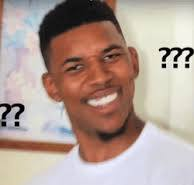

 Basically complicated wa of saying, You give me probabilitites and I will give you integers which are sampled(distributed maybe) according to their probability distribution

Also to make everything deterministic, we are going to use a Generator object in pytorch, basically every time everyone will get the same result

In [29]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
# Generating 3 random numbers using the generator, so we can reproduce the same random numbers
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

probability of first element in the tensor is around 60%, So we expect the first number, so in the following 20 samples, we would expect 60% of them to be 0, we expect 30% of them to be 1, and around 10% to be 2.

In [30]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)
# Generating 20 samples from the multinomial distribution, replacement=True means we can sample the same number again (just like putting the ball back in the bag)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

Now let's sample from our N[0]

In [31]:
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p/p.sum()
torch.multinomial(p, num_samples=1, replacement=True, generator=g)

tensor([10])

In [32]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix)
print(itos[ix])

19
s


So we are sampling the 13th index wala character which is m, which makes sense if you see the graph as m is appearing a decent number of time in the start.

Now to draw the next character, we will go to the row that starts with m, then we will again count and again generate the next character. And that's how the loop goes. Hope you get the gist, now we can start writing the loop

In [33]:
g = torch.Generator().manual_seed(2147483647)

ix = 0
while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print(itos[ix])
    if ix == 0:
        # That is if we get the end sequence, break
        break

j
u
n
i
d
e
.


In [34]:
# Let's store the outputs in a list

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            # That is if we get the end sequence, break
            break
    print(''.join(out))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


The reason that these outputs seem terribl because bigram model is that simple

In [35]:
# Let's store the outputs in a list

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p = p / p.sum()

        p = torch.ones(27) / 27.0 
        # Making it unirform sitribution where everything is equally likely, basically to show what an untrained model looks like


        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            # That is if we get the end sequence, break
            break
    print(''.join(out))


juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.
f.
.
ndxjxfpvslqtikyzsaloevgvvnundewkfmbjzqegruxiteaxchwtmurzsodridcdznojvaliypvrghvxtezrwguciqqvywhqelv.
viosvhibdhnceukgmtmwboscnbzoiwupnwnpipixtewbgsgyewfdacbfcxrvjypkmsbranmjrdsydotafvkdkbdepihzpwzsqdab.
vfuolwbasrtugttbiqbujfdtskceqjtcdlcndfujqllsppgkltalmlokdmsl.
fddmxjv.
mfsgxmw.
vdihkvngtojvrdsyqivcob.
uziengogtjvnvqgfjtkqufrxfjlwglykiiluohgnoiuwzylq.
fsgircvmhtipagkxwvjypnsriadmfujnlkcicvatjvryzeljxkbrlrjsp.


Hope we get the gist

But the above is a highly ineffiecient way, because what we are doing is 
```
while True:
        p = N[ix].float()
        p = p / p.sum()
```
We are always fetching a row of N from the counts matrix and we keep deviding it for each iteration of the loop. We can prepare a matrix P which has all the probabilitites in it

In [36]:
P = N.float()

In [37]:
# P = P / P.sum()
# We cant do this as P.sum() is the sum of all the elements in the matrixm, 
# what we want is to divide the elements in the row by the sum of the row
P.sum()


tensor(228146.)

If we go to the torch.sum documentation
```
torch.sum(input, dim, keepdim=False, *, dtype=None) → Tensor
```

Returns the sum of each row of the input tensor in the given dimension dim. If dim is a list of dimensions, reduce over all of them.

If keepdim is True, the output tensor is of the same size as input except in the dimension(s) dim where it is of size 1. Otherwise, dim is squeezed (see torch.squeeze()), resulting in the output tensor having 1 (or len(dim)) fewer dimension(s).

Parameters
- input (Tensor) – the input tensor.

- dim (int or tuple of ints, optional) – the dimension or dimensions to reduce. If None, all dimensions are reduced.

- keepdim (bool) – whether the output tensor has dim retained or not.


In [38]:
P.shape

torch.Size([27, 27])

In [39]:
# When we sum up accross axis 0, then we will be taking the zeroth dimension and we would be summing acrosss it, 
# 0th dimension is the row
P.sum(0)

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [40]:
P.sum(0).shape

torch.Size([27])

In [41]:
P.sum(0, keepdim=True)

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

In [42]:
P.sum(0, keepdim=True).shape
# We get a row vector
# We dont want a row vector as this gives us sum across the columns

torch.Size([1, 27])

In [43]:
P.sum(1, keepdim=True).shape
# Basically we are going horizontally and this 27x27 matrix becomes a 27x1 array, try to visualise it, It's cool

torch.Size([27, 1])

In [44]:
P.sum(1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [45]:
P = N.float()
P = P / P.sum(1, keepdim=True)

# Now can we divide a 27x27 matrix by a 27x1 matrix? Whether or not if we can perform this operation is determined
# by what's called the broadcasting rules. Search Broadcasting semantics in torch, 
# and dedicate a resepectful amount of time to understand it. Don't rush it

# When we do P = P / P.sum(1, keepdim=True), Basically what it does is that it takes the 27x1 matrix, stretches it
# to 27x27 matrix and then it does a element wise division

# Basically takes 27x1, copies it 27 times to make it a 27x27 matrix and then does the division

In [46]:
P = N.float()
# P = P / P.sum(1, keepdim=True)
P /= P.sum(1) # This is effiecient as it does the division in place

In [47]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            # That is if we get the end sequence, break
            break
    print(''.join(out))


juwidedigwaquzopruffyobinn.
fovinttophows.
gwevisliniauwabileviackhbduinrwiqulysstyicaylaftezufftumestfodoumjuppptsuwahouzzi.
core.
ysezockhawavedinerimouffwynin.
wicasn.
mppimopsuxxxdgossmpttavicuqurphufothotorkyrslu.
igumubri.
mmevujemahuxxwyubevavickarr.
wdohufforta.
mppydabelyuquiqumuwoockazhemimayawathub.
sexxxtzzylitikyzzaloevevinushewkffrushemph.
ftenzyuwy.
joffodridrdwnonialiypprghaxtezrwayliquvywhqulvaviosthibdhaceldgttewixsstoboniupexxxippetewylowyccodacrcqurviynkwsowannjwesodomafffttorepiguqweshdabrviuchweahrtugttilybusthtouwequton.
codfrdwelipphkwtalveondwal.
fidmahv.
mmigama.
veghkongh.
jordiynivixi.
qukengwgtivyvegusth.


Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

Let's say 27x27 ko [27] se divide krna hai

=> [27,27] / [27]

=> 27, 27

=> Empty, 27

Pehle aise right mein align kro, and right to left check kro if the rule holds, here technically the rule holds and it's broadcastable, but doing it will create a bug, because pytorch will make it [1, 27] and will copy it untill it becomes 27x27 but the problem is yee column ka sum ban jaayega, instead of row ka sum, this happens because right mein align krne ke wajah se pytorch isko [1,27] bna dega pehle.

Therefore, P = P / P.sum(1) will be a bug and won't produce meaningful names

#### Now let's evaluate the quality of the model

In [48]:
# Let's look at the probabilitites the model assign to each of the bigram

for word in words[:3]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f'{ch1}{ch2}: {prob:.4f}')

.e: 0.0750
em: 0.1158
mm: 0.0253
ma: 0.0764
a.: 0.2073
.o: 0.0497
ol: 0.0443
li: 0.1401
iv: 0.1045
vi: 0.0515
ia: 0.0722
a.: 0.2073
.a: 0.1301
av: 0.3241
va: 0.0189
a.: 0.2073


In [49]:
# If everything was equally likely. 1/ 27 = 0.037, so any bigram with a 
# probability higher than this tells us that we learned something

# If we have a very good model, we should be able to get a probability of close to 1 for the bigrams

# How can we summarise these probabilitites into a single number that measures the quality of the model?

# What is typically used here is to take the likelihood, and the likelihood is the product of all of these probabilitites

# So when we have a good model, the product of these probabilities should be very high, but we see all the
# probabilities are less than 1, so the product of these probabilities will be a very small number
# So we take the log of the likelihood, and we get the log likelihood for convenience

In [50]:
# Let's look at the probabilitites the model assign to each of the bigram

for word in words[:3]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

.e: 0.0750 -2.5907
em: 0.1158 -2.1561
mm: 0.0253 -3.6772
ma: 0.0764 -2.5713
a.: 0.2073 -1.5737
.o: 0.0497 -3.0026
ol: 0.0443 -3.1157
li: 0.1401 -1.9654
iv: 0.1045 -2.2581
vi: 0.0515 -2.9668
ia: 0.0722 -2.6289
a.: 0.2073 -1.5737
.a: 0.1301 -2.0391
av: 0.3241 -1.1266
va: 0.0189 -3.9661
a.: 0.2073 -1.5737


In [51]:
# log(a*b*c) = log(a) + log(b) + log(c), basically it accumulates

log_likelihood = 0.0
for word in words[:3]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'log_likelihood = {log_likelihood:.4f}')

.e: 0.0750 -2.5907
em: 0.1158 -2.1561
mm: 0.0253 -3.6772
ma: 0.0764 -2.5713
a.: 0.2073 -1.5737
.o: 0.0497 -3.0026
ol: 0.0443 -3.1157
li: 0.1401 -1.9654
iv: 0.1045 -2.2581
vi: 0.0515 -2.9668
ia: 0.0722 -2.6289
a.: 0.2073 -1.5737
.a: 0.1301 -2.0391
av: 0.3241 -1.1266
va: 0.0189 -3.9661
a.: 0.2073 -1.5737
log_likelihood = -38.7856


In [52]:
# So how high the log likelihood can get? well when all the probabilities are 1, then the log likelihood is 0
# and when all the probabilites are lower, log likelihood will grow more and more negative

# Now we dont actually like this because what we like is a loss function, and loss function has a semantics 
# that lower is good, because we are trying to minimize the loss, so we need to invert this, and that's what gives
# us the negative log likelihood, so we can use the negative log likelihood as a loss function

In [53]:
# log(a*b*c) = log(a) + log(b) + log(c), basically it accumulates

log_likelihood = 0.0
for word in words[:3]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'log_likelihood = {log_likelihood:.4f}')
nll = -log_likelihood
print(f'nll = {nll:.4f}')

.e: 0.0750 -2.5907
em: 0.1158 -2.1561
mm: 0.0253 -3.6772
ma: 0.0764 -2.5713
a.: 0.2073 -1.5737
.o: 0.0497 -3.0026
ol: 0.0443 -3.1157
li: 0.1401 -1.9654
iv: 0.1045 -2.2581
vi: 0.0515 -2.9668
ia: 0.0722 -2.6289
a.: 0.2073 -1.5737
.a: 0.1301 -2.0391
av: 0.3241 -1.1266
va: 0.0189 -3.9661
a.: 0.2073 -1.5737
log_likelihood = -38.7856
nll = 38.7856


In [54]:
# Also for convenience, we can take the average of the negative log likelihood instead of sum

log_likelihood = 0.0
n = 0

for word in words[:3]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'log_likelihood = {log_likelihood:.4f}')
nll = -log_likelihood
print(f'nll = {nll:.4f}')
print(f'normalised negative log likelihood = {nll/n:.4f}')

.e: 0.0750 -2.5907
em: 0.1158 -2.1561
mm: 0.0253 -3.6772
ma: 0.0764 -2.5713
a.: 0.2073 -1.5737
.o: 0.0497 -3.0026
ol: 0.0443 -3.1157
li: 0.1401 -1.9654
iv: 0.1045 -2.2581
vi: 0.0515 -2.9668
ia: 0.0722 -2.6289
a.: 0.2073 -1.5737
.a: 0.1301 -2.0391
av: 0.3241 -1.1266
va: 0.0189 -3.9661
a.: 0.2073 -1.5737
log_likelihood = -38.7856
nll = 38.7856
normalised negative log likelihood = 2.4241


So basically the job of our training is to find to parameters to minimise the negative log likelihood loss

In [55]:
# Goal: maximise likelihood of the data w.r.t. the model parameters (statistical modelling)
# equivalent to maximising the log likelihood because log is monotonic
# equivalent to minimising the negative log likelihood
# equivalent to minimising the average negative log likelihood

In [56]:
# Also right now we are storing the probabilities in a table, coming up these numbers won't be stored
# explicitly but will be calculated by neural networks, and we can change the parameters of the neural networks
# to maximise the likelihood of the data, and this is what we will be doing next 

In [57]:
# Let's look at the loss function for entire words

# Also for convenience, we can take the average of the negative log likelihood instead of sum

log_likelihood = 0.0
n = 0

for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

# print(f'log_likelihood = {log_likelihood:.4f}')
nll = -log_likelihood
# print(f'nll = {nll:.4f}')
print(f'normalised negative log likelihood = {nll/n:.4f}')


normalised negative log likelihood = 2.4545


In [58]:
# Also we can evaluate the probability for any word we want

log_likelihood = 0.0
n = 0

for word in ["rahul", "bipul"]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')


nll = -log_likelihood
print(f'normalised negative log likelihood = {nll/n:.4f}')


.r: 0.1291 -2.0475
ra: 0.0695 -2.6660
ah: 0.3062 -1.1835
hu: 0.0530 -2.9384
ul: 0.0216 -3.8367
l.: 0.0410 -3.1937
.b: 0.4938 -0.7057
bi: 0.0123 -4.4015
ip: 0.0517 -2.9631
pu: 0.0013 -6.6641
ul: 0.0216 -3.8367
l.: 0.0410 -3.1937
normalised negative log likelihood = 3.1359


In [59]:
# Also we can evaluate the probability for any word we want

log_likelihood = 0.0
n = 0

for word in ["rahuljq"]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')


nll = -log_likelihood
print(f'normalised negative log likelihood = {nll/n:.4f}')


.r: 0.1291 -2.0475
ra: 0.0695 -2.6660
ah: 0.3062 -1.1835
hu: 0.0530 -2.9384
ul: 0.0216 -3.8367
lj: 0.0021 -6.1807
jq: 0.0000 -inf
q.: 0.0009 -7.0423
normalised negative log likelihood = inf


We see the loss to be infinity here. Because the probability for jq is 0 as the count of jq in table is 0, making the entire likelihood to be zero

There is a simple fix for this which is called model smoothing, basically we will add some fake counts, like  let's say the count of 1 by default for every bigram

P = (N + 1).float()

You can add any number you want, bigger the number, the more smoother the model will be

This will ensure there is no zero in our probability matrix P

In [60]:
P = (N+1).float()
P = P / P.sum(1, keepdim=True)

In [61]:
# Also we can evaluate the probability for any word we want

log_likelihood = 0.0
n = 0

for word in ["rahuljq"]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')


nll = -log_likelihood
print(f'normalised negative log likelihood = {nll/n:.4f}')


.r: 0.0512 -2.9729
ra: 0.1852 -1.6863
ah: 0.0688 -2.6766
hu: 0.0219 -3.8236
ul: 0.0955 -2.3485
lj: 0.0005 -7.5998
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
normalised negative log likelihood = 3.9278


### Let's create the bigram dataset for the neural net

In [62]:
# Create the training set of bigrams (x,y) where x is the first character and y is the second character
# Training set will be made up of two lists

xs, ys = [], []

for word in words[:1]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [63]:
xs

tensor([ 0,  5, 13, 13,  1])

In [64]:
ys

tensor([ 5, 13, 13,  1,  0])

here we can see we have five examples for our neural network, in the first example we can see that if the input is integer 0, which corresponds to the starting sequence, then the desired output should be 5 which corresponds to e and so on, so if the input is 5, we want the weights to be arranged in such a way that 13 gets the most probability and so on...

so let's encode the integers, so we have one hot encoding in pytorch

In [65]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [66]:
xenc.shape

torch.Size([5, 27])

In [67]:
xenc.dtype

torch.int64

**so this is an issue here. We always want to pay very very close attention to datatypes. when we are plugging numners to neural nets, we dont want them to be integers. we want them to be floating point numbers that can take on various values. And in the above case, it is 64 bit integers. this is because one hot recieved 64 bit integer and returned the same datatype.**

so we will cast xenc to float

In [68]:
xenc.float()
xenc.dtype
# this doesn't work

torch.int64

In [69]:
xenc = F.one_hot(xs, num_classes=27).float()

In [70]:
xenc.dtype

torch.float32

so let's define the initial weights of this neuron, we know a neuron just does wx + b, let's initialise the weight with torch.randn

In [71]:
W = torch.randn((27,1))
# the 1 is representing the presence of one single neuron
xenc @ W

tensor([[-0.9499],
        [-1.9256],
        [-0.2650],
        [-0.2650],
        [ 0.8867]])

In [73]:
W = torch.randn((27,27))
# this will in parallel will evaluate all the 27 neurons on all the 5 inputs
xenc @ W

tensor([[-1.3403e-03,  9.2296e-02,  1.0438e+00,  1.9705e-01, -2.2367e+00,
          1.6107e+00, -1.4805e+00,  1.2892e+00,  3.0169e-01, -1.4354e-01,
          7.3916e-01, -1.7982e-02, -1.6702e+00,  1.5142e+00, -1.8706e-01,
         -1.5161e+00, -7.7322e-01, -6.6957e-01,  2.2530e+00,  4.8209e-01,
         -2.6329e-01, -4.4869e-01,  1.0617e+00, -1.8042e-01,  2.0479e+00,
          5.9131e-01, -5.9524e-01],
        [-1.4053e+00,  4.2918e-01, -4.5396e-01,  8.2439e-01, -1.7365e+00,
          1.4469e+00,  1.4706e+00, -8.7070e-01, -1.4005e+00,  1.0440e-01,
         -8.0114e-01, -4.0801e-01, -7.7811e-01, -2.9718e-01, -6.1037e-01,
         -1.8820e+00,  5.8199e-01, -6.6176e-02, -1.9623e+00, -9.5782e-01,
         -7.3755e-01,  1.6329e+00, -1.2893e+00, -3.0085e-01,  1.3740e-01,
          1.2996e-02,  9.7150e-01],
        [-2.8176e-01,  3.4402e-01,  1.8702e+00,  7.0439e-01,  2.6527e-01,
          4.7555e-01,  9.2007e-02,  8.3452e-01, -7.5769e-01, -8.6075e-01,
         -5.3615e-01, -2.3631e-01, -8.27

In [74]:
(xenc @ W).shape

torch.Size([5, 27])

##### so what is every element in this dot product is telling us?

**it's telling us that for every one of 27 neuron that we created, what is the firing rate of those neurons on every one of those 5 examples**


In [75]:
(xenc @ W)[3,13]
# this will tell us the firing rate of the 13th neuron 
# looking at the third input and this was achieved by a 
# dot product between the third input and 13th column of the weight matrix 

tensor(-0.2566)

These outputs are numbers, we want probabilities. We can apply softmax activation

In [77]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N matrix we made before
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0186, 0.0205, 0.0530, 0.0227, 0.0020, 0.0935, 0.0042, 0.0678, 0.0252,
         0.0162, 0.0391, 0.0183, 0.0035, 0.0849, 0.0155, 0.0041, 0.0086, 0.0096,
         0.1777, 0.0302, 0.0144, 0.0119, 0.0540, 0.0156, 0.1447, 0.0337, 0.0103],
        [0.0074, 0.0466, 0.0193, 0.0693, 0.0053, 0.1291, 0.1322, 0.0127, 0.0075,
         0.0337, 0.0136, 0.0202, 0.0139, 0.0226, 0.0165, 0.0046, 0.0544, 0.0284,
         0.0043, 0.0117, 0.0145, 0.1555, 0.0084, 0.0225, 0.0348, 0.0308, 0.0802],
        [0.0240, 0.0448, 0.2061, 0.0642, 0.0414, 0.0511, 0.0348, 0.0732, 0.0149,
         0.0134, 0.0186, 0.0251, 0.0139, 0.0246, 0.0041, 0.0129, 0.0094, 0.0162,
         0.0172, 0.0761, 0.0265, 0.0342, 0.0168, 0.0169, 0.0844, 0.0105, 0.0248],
        [0.0240, 0.0448, 0.2061, 0.0642, 0.0414, 0.0511, 0.0348, 0.0732, 0.0149,
         0.0134, 0.0186, 0.0251, 0.0139, 0.0246, 0.0041, 0.0129, 0.0094, 0.0162,
         0.0172, 0.0761, 0.0265, 0.0342, 0.0168, 0.0169, 0.0844, 0.0105, 0.0248],
        [0.0063, 0.0334,

In [78]:
probs.shape

torch.Size([5, 27])

In [80]:
probs[0]
# so when we are feeding this 0, i.e the starting sequence . in the neural net and outcame this distribution of probabilities
# and we are going to interpret this as the neural net assignment for how likely each of the 27 characters are to come next.

tensor([0.0186, 0.0205, 0.0530, 0.0227, 0.0020, 0.0935, 0.0042, 0.0678, 0.0252,
        0.0162, 0.0391, 0.0183, 0.0035, 0.0849, 0.0155, 0.0041, 0.0086, 0.0096,
        0.1777, 0.0302, 0.0144, 0.0119, 0.0540, 0.0156, 0.1447, 0.0337, 0.0103])

In [ ]:
# Now we just want to optimise to get a better W such that the probabilities coming out are pretty good and the way we measure pretty good is by the loss function